In [1]:
%pip install pandas scikit-learn matplotlib seaborn
%pip install openpyxl
%pip install --upgrade pip
# Import necessary libraries
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
%pip install openpyxl

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

warnings.filterwarnings('ignore')
# Set random seed for reproducibility           
RANDOM_SEED = 42
# Set the style of seaborn
sns.set(style="whitegrid")
# Set the figure size for all plots
plt.figure(figsize=(10, 6))
# Set the default color palette for seaborn
sns.set_palette("deep")
# Set the default font size for all plots
plt.rcParams['font.size'] = 12
# Set the default figure size for all plots
plt.rcParams['figure.figsize'] = (10, 6)
# Set the default figure dpi for all plots
plt.rcParams['figure.dpi'] = 100
# Set the default figure face color for all plots
plt.rcParams['figure.facecolor'] = 'white'

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


<Figure size 1000x600 with 0 Axes>

In [2]:
# --------- Dados estruturados para os 19 subníveis ---------
dados = {
    "Subniveis": ["8E", "8D", "8C", "8B", "8A", "7B", "7A", "6B", "6A", "5A",
                  "4B", "4A", "3A", "2B", "2A", "1D", "1C", "1B", "1A"],
    "Espessura": [3.5, 5.5, 5.5, 3.0, 4.5, 4.5, 6.5, 7.5, 8.0, 8.0,
                  7.0, 5.5, 6.5, 6.5, 5.5, 6.0, 4.0, 1.5, 2.5],
    "N. AMOSTRAS": [7, 9, 8, 17, 20, 3, 13, 15, 4, 11,
                    52, 25, 14, 25, 8, 14, 7, 10, 8],
    "MOA-NF": [29, 27, 62, 54, 70, 64, 71, 78, 74, 62,
               75, 89, 84, 89, 79, 72, 71, 68, 69],
    "OP-AL": [4, 10, 3, 7, 3, 1, 2, 4, 3, 4,
              2, 1, 0, 1, 0, 1, 2, 2, 3],
    "OP-EQUI": [2, 3, 1, 4, 1, 0, 0, 1, 0, 0,
                0, 0, 0, 0, 0, 0, 0, 1, 0],
    "2010": [6, 12, 12, 5, 9, 92, 30, 15, 18, 51,
             125, 75, 57, 44, 20, 20, 6, 0, 0],
    "2010.1": [10, 25, 25, 8, 18, 100, 71, 50, 54, 166,
               150, 91, 113, 52, 40, 64, 45, 10, 0],
    "Fe2O3": [None, None, None, None, None, None, 7.06, None, 6.66, 6.41,
              None, 5.23, 7.41, 5.99, 6.89, 5.78, 5.25, 5.52, 4.94],
    "U/Th": [None, None, None, None, None, None, 2.06, None, 1.98, 1.82,
             None, 1.81, 1.66, 1.35, 1.28, 1.11, 1.17, 1.51, 1.48],
    "Al2O3": [None, None, None, None, None, None, 14.13, None, 14.31, 13.69,
              None, 14.10, 13.62, 15.01, 14.65, 13.95, 14.89, 13.38, 13.12],
    "TiO2": [None, None, None, None, None, None, 0.57, None, 0.55, 0.59,
             None, 0.61, 0.60, 0.61, 0.61, 0.62, 0.64, 0.61, 0.63],
    "MOA": [None, None, None, None, None, None, 327, None, 286, 248,
            None, 258, 289, 286, 338, 321, 266, 251, 190],
    "TS": [None, None, None, None, None, None, 1.49, None, 1.96, 2.73,
           None, 4.54, 1.71, 1.24, 1.72, 3.98, 3.67, 1.73, 2.62],
    "TOC": [None, None, None, None, None, None, 11.93, None, 12.11, 11.70,
            None, 12.01, 13.05, 8.79, 7.69, 5.73, 7.42, 12.41, 12.97],
    "TN": [None, None, None, None, None, None, 0.43, None, 0.46, 0.44,
           None, 0.43, 0.54, 0.32, 0.29, 0.18, 0.26, 0.52, 0.54]
}
# Create a DataFrame from the dictionary
df = pd.DataFrame(dados)
# Display the first few rows of the DataFrame
df.head()
# Display the DataFrame information
df.info()
# Display the DataFrame statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Subniveis    19 non-null     object 
 1   Espessura    19 non-null     float64
 2   N. AMOSTRAS  19 non-null     int64  
 3   MOA-NF       19 non-null     int64  
 4   OP-AL        19 non-null     int64  
 5   OP-EQUI      19 non-null     int64  
 6   2010         19 non-null     int64  
 7   2010.1       19 non-null     int64  
 8   Fe2O3        11 non-null     float64
 9   U/Th         11 non-null     float64
 10  Al2O3        11 non-null     float64
 11  TiO2         11 non-null     float64
 12  MOA          11 non-null     float64
 13  TS           11 non-null     float64
 14  TOC          11 non-null     float64
 15  TN           11 non-null     float64
dtypes: float64(9), int64(6), object(1)
memory usage: 2.5+ KB


,Espessura,N. AMOSTRAS,MOA-NF,OP-AL,OP-EQUI,2010,2010.1,Fe2O3,U/Th,Al2O3,TiO2,MOA,TS,TOC,TN
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,5.342105,14.210526,67.736842,2.789474,0.684211,31.421053,57.473684,6.103636,1.566364,14.077273,0.603636,278.181818,2.490000,10.528182,0.400909
std,1.841291,11.078402,16.612720,2.417045,1.157230,34.525861,47.763734,0.833502,0.324354,0.607768,0.025796,42.444831,1.118562,2.601141,0.121281
min,1.500000,3.000000,27.000000,0.000000,0.000000,0.000000,0.000000,4.940000,1.110000,13.120000,0.550000,190.000000,1.240000,5.730000,0.180000
25%,4.250000,8.000000,63.000000,1.000000,0.000000,7.500000,21.500000,5.385000,1.315000,13.655000,0.595000,254.500000,1.715000,8.240000,0.305000
50%,5.500000,11.000000,71.000000,2.000000,0.000000,18.000000,50.000000,5.990000,1.510000,14.100000,0.610000,286.000000,1.960000,11.930000,0.430000
75%,6.500000,16.000000,76.500000,3.500000,1.000000,47.500000,81.000000,6.775000,1.815000,14.480000,0.615000,305.000000,3.200000,12.260000,0.490000
max,8.000000,52.000000,89.000000,10.000000,4.000000,125.000000,166.000000,7.410000,2.060000,15.010000,0.640000,338.000000,4.540000,13.050000,0.540000


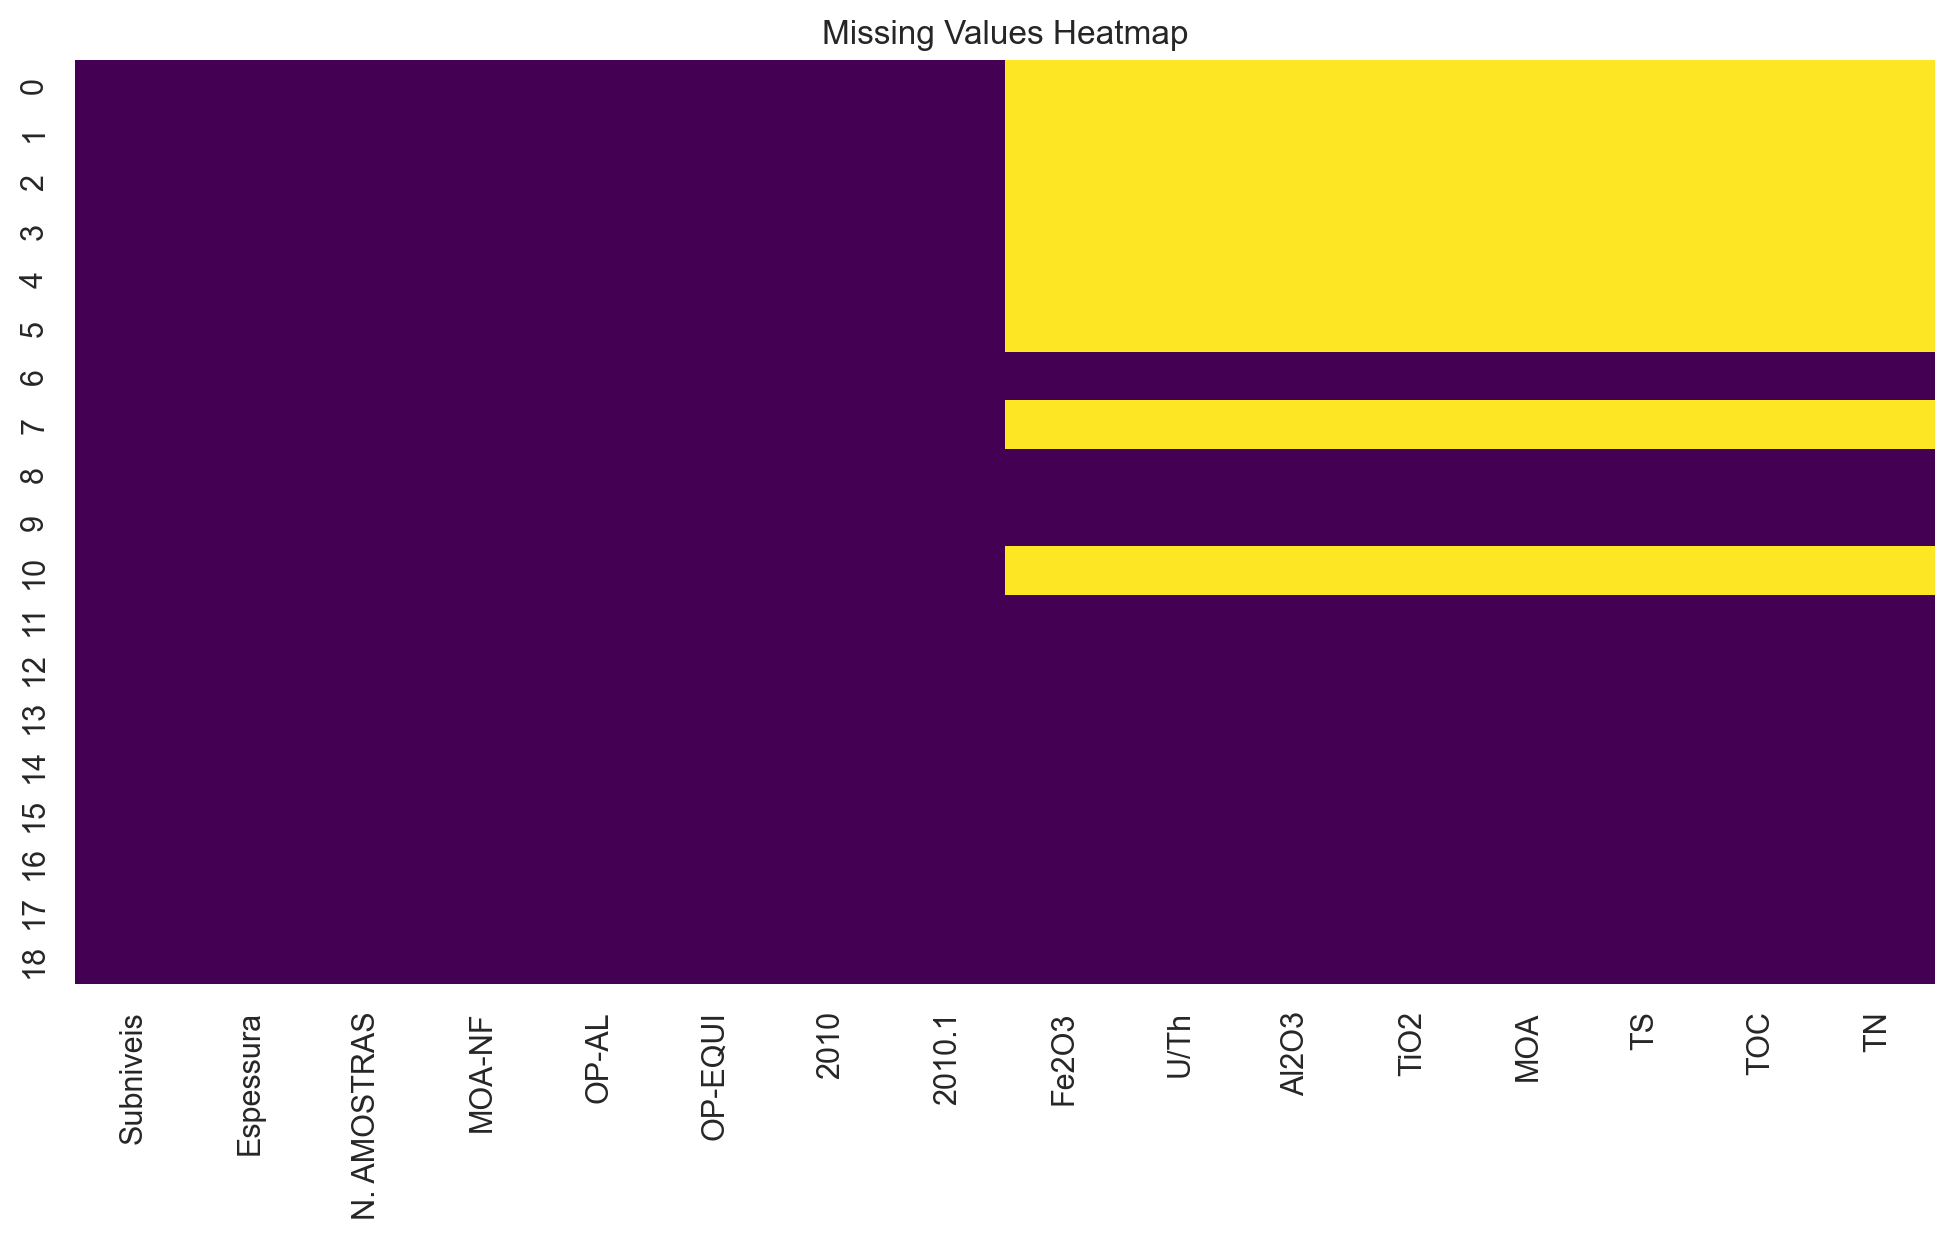

In [3]:
# Check for missing values
missing_values = df.isnull().sum()  
# Display the missing values
missing_values[missing_values > 0]
# Visualize the missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap') 
plt.show()

In [4]:
# 1. estimar os valores ausentes   
df_copy = df.copy()
# Define the features and target variable
X = df_copy.drop(columns=["Subniveis", "MOA"])
y = df_copy["MOA"]
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)
# Initialize the SimpleImputer
imputer = SimpleImputer(strategy='mean')
# Fit the imputer on the training data
imputer.fit(X_train)
# Transform the training and testing data
X_train_imputed = imputer.transform(X_train)
X_test_imputed = imputer.transform(X_test)  
# Create a DataFrame from the imputed data
X_train_imputed_df = pd.DataFrame(X_train_imputed, columns=X.columns)
X_test_imputed_df = pd.DataFrame(X_test_imputed, columns=X.columns)

# Concatenate the imputed data with the original DataFrame
df_imputed = pd.concat([df_copy.drop(columns=["MOA"]), X_train_imputed_df], axis=1)
# Add the target variable to the imputed DataFrame
df_imputed["MOA"] = y_train.reset_index(drop=True)
# Display the imputed DataFrame
df_imputed.head()
# Define a opção para mostrar todas as linhas
pd.set_option('display.max_rows', None)

# Agora imprime o DataFrame completo
print(df_imputed)

   Subniveis  Espessura  N. AMOSTRAS  MOA-NF  OP-AL  OP-EQUI  2010  2010.1  \
0         8E        3.5            7      29      4        2     6      10   
1         8D        5.5            9      27     10        3    12      25   
2         8C        5.5            8      62      3        1    12      25   
3         8B        3.0           17      54      7        4     5       8   
4         8A        4.5           20      70      3        1     9      18   
5         7B        4.5            3      64      1        0    92     100   
6         7A        6.5           13      71      2        0    30      71   
7         6B        7.5           15      78      4        1    15      50   
8         6A        8.0            4      74      3        0    18      54   
9         5A        8.0           11      62      4        0    51     166   
10        4B        7.0           52      75      2        0   125     150   
11        4A        5.5           25      89      1        0    

In [5]:
# 2. Separar parte vermelha (treinamento) e azul (predição)
dados_completos = df.dropna(subset=["Fe2O3", "U/Th", "Al2O3", "TiO2", "MOA", "TS", "TOC", "TN"])
dados_faltantes = df[df[["Fe2O3", "U/Th", "Al2O3", "TiO2", "MOA", "TS", "TOC", "TN"]].isnull().any(axis=1)]

# 3. Selecionar colunas preditoras (X) e alvos (y)
colunas_X = ["Espessura", "N. AMOSTRAS", "MOA-NF", "OP-AL", "OP-EQUI", "2010", "2010.1"]
colunas_y = ["Fe2O3", "U/Th", "Al2O3", "TiO2", "MOA", "TS", "TOC", "TN"]

X_train = dados_completos[colunas_X]
y_train = dados_completos[colunas_y]

X_pred = dados_faltantes[colunas_X]

# 4. Tratar possíveis NaNs nos dados de entrada
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

if not X_pred.empty:
	X_pred_imputed = imputer.transform(X_pred)

	# 5. Modelo preditivo multivariado
	model = RandomForestRegressor(n_estimators=100, random_state=42)
	model.fit(X_train_imputed, y_train)

	# 6. Prever os valores ausentes
	y_pred = model.predict(X_pred_imputed)

	# 7. Inserir valores previstos no dataframe original
	df.loc[dados_faltantes.index, colunas_y] = y_pred
	# 7.1. Criar coluna 'Fonte' marcando origem dos dados
df["Fonte"] = "Original"
df.loc[dados_faltantes.index, "Fonte"] = "Imputado"


# 8. Exportar resultado final
print(df.loc[:, ["Subniveis", "Fe2O3", "U/Th", "Al2O3", "TiO2", "MOA", "TS", "TOC", "TN"]])

df.to_excel("resultado_completo_com_fonte.xlsx", index=False)

   Subniveis   Fe2O3    U/Th    Al2O3    TiO2     MOA      TS      TOC      TN
0         8E  5.5515  1.4563  13.8452  0.6185  246.05  2.5779  10.8746  0.4316
1         8D  5.8495  1.5371  13.7821  0.6095  256.68  2.4111  11.0388  0.4347
2         8C  5.7159  1.4635  13.9328  0.6151  258.58  2.5351  10.5278  0.4127
3         8B  5.6574  1.5361  13.6482  0.6123  245.75  2.4548  11.4289  0.4550
4         8A  5.5755  1.4292  13.9257  0.6194  255.00  2.6556  10.4413  0.4097
5         7B  5.8387  1.5778  13.9778  0.6085  261.36  2.8967  10.8257  0.4132
6         7A  7.0600  2.0600  14.1300  0.5700  327.00  1.4900  11.9300  0.4300
7         6B  6.4822  1.6062  14.2717  0.5891  301.00  2.1203   9.9870  0.3734
8         6A  6.6600  1.9800  14.3100  0.5500  286.00  1.9600  12.1100  0.4600
9         5A  6.4100  1.8200  13.6900  0.5900  248.00  2.7300  11.7000  0.4400
10        4B  6.4361  1.6886  14.0603  0.5973  288.95  2.4666  11.1551  0.4198
11        4A  5.2300  1.8100  14.1000  0.6100  258.0

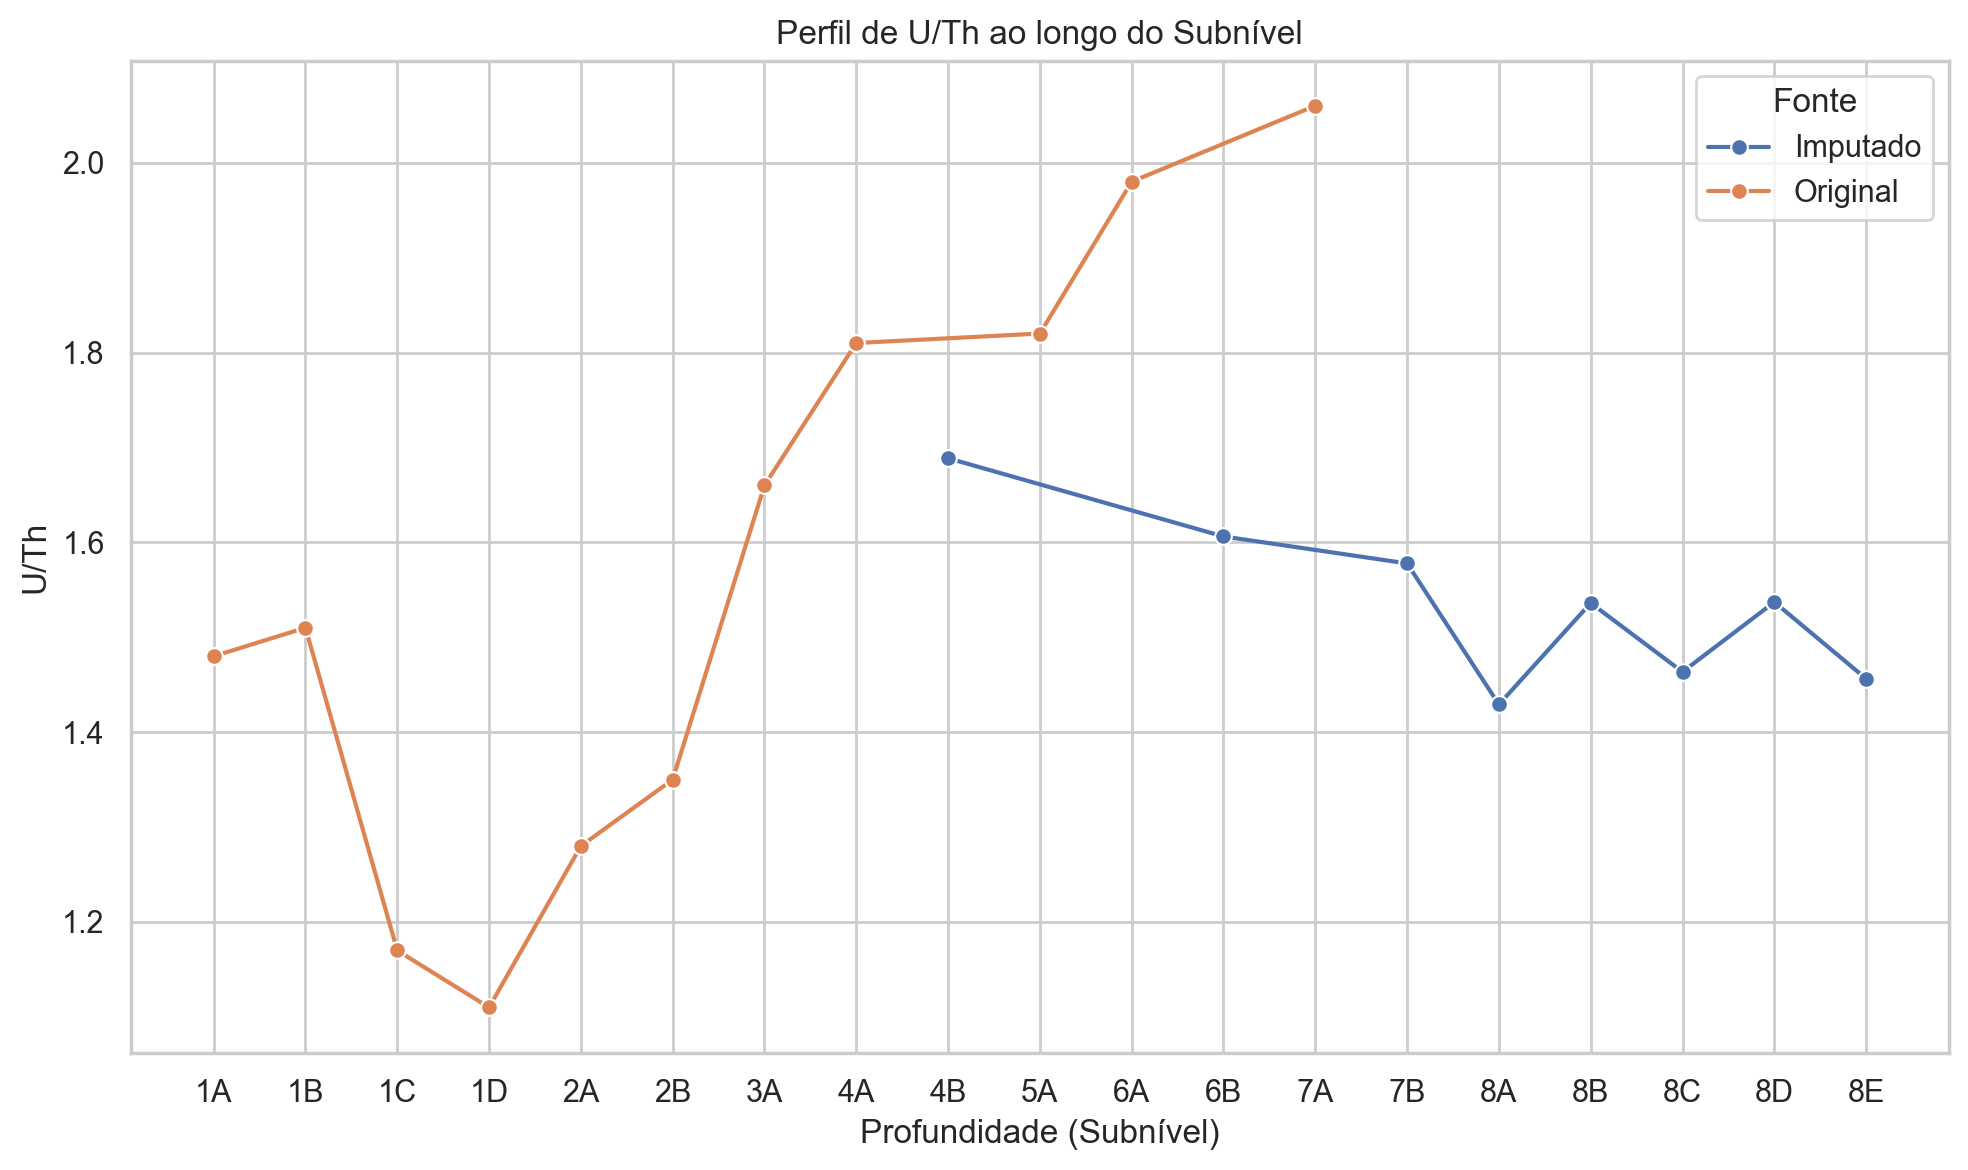

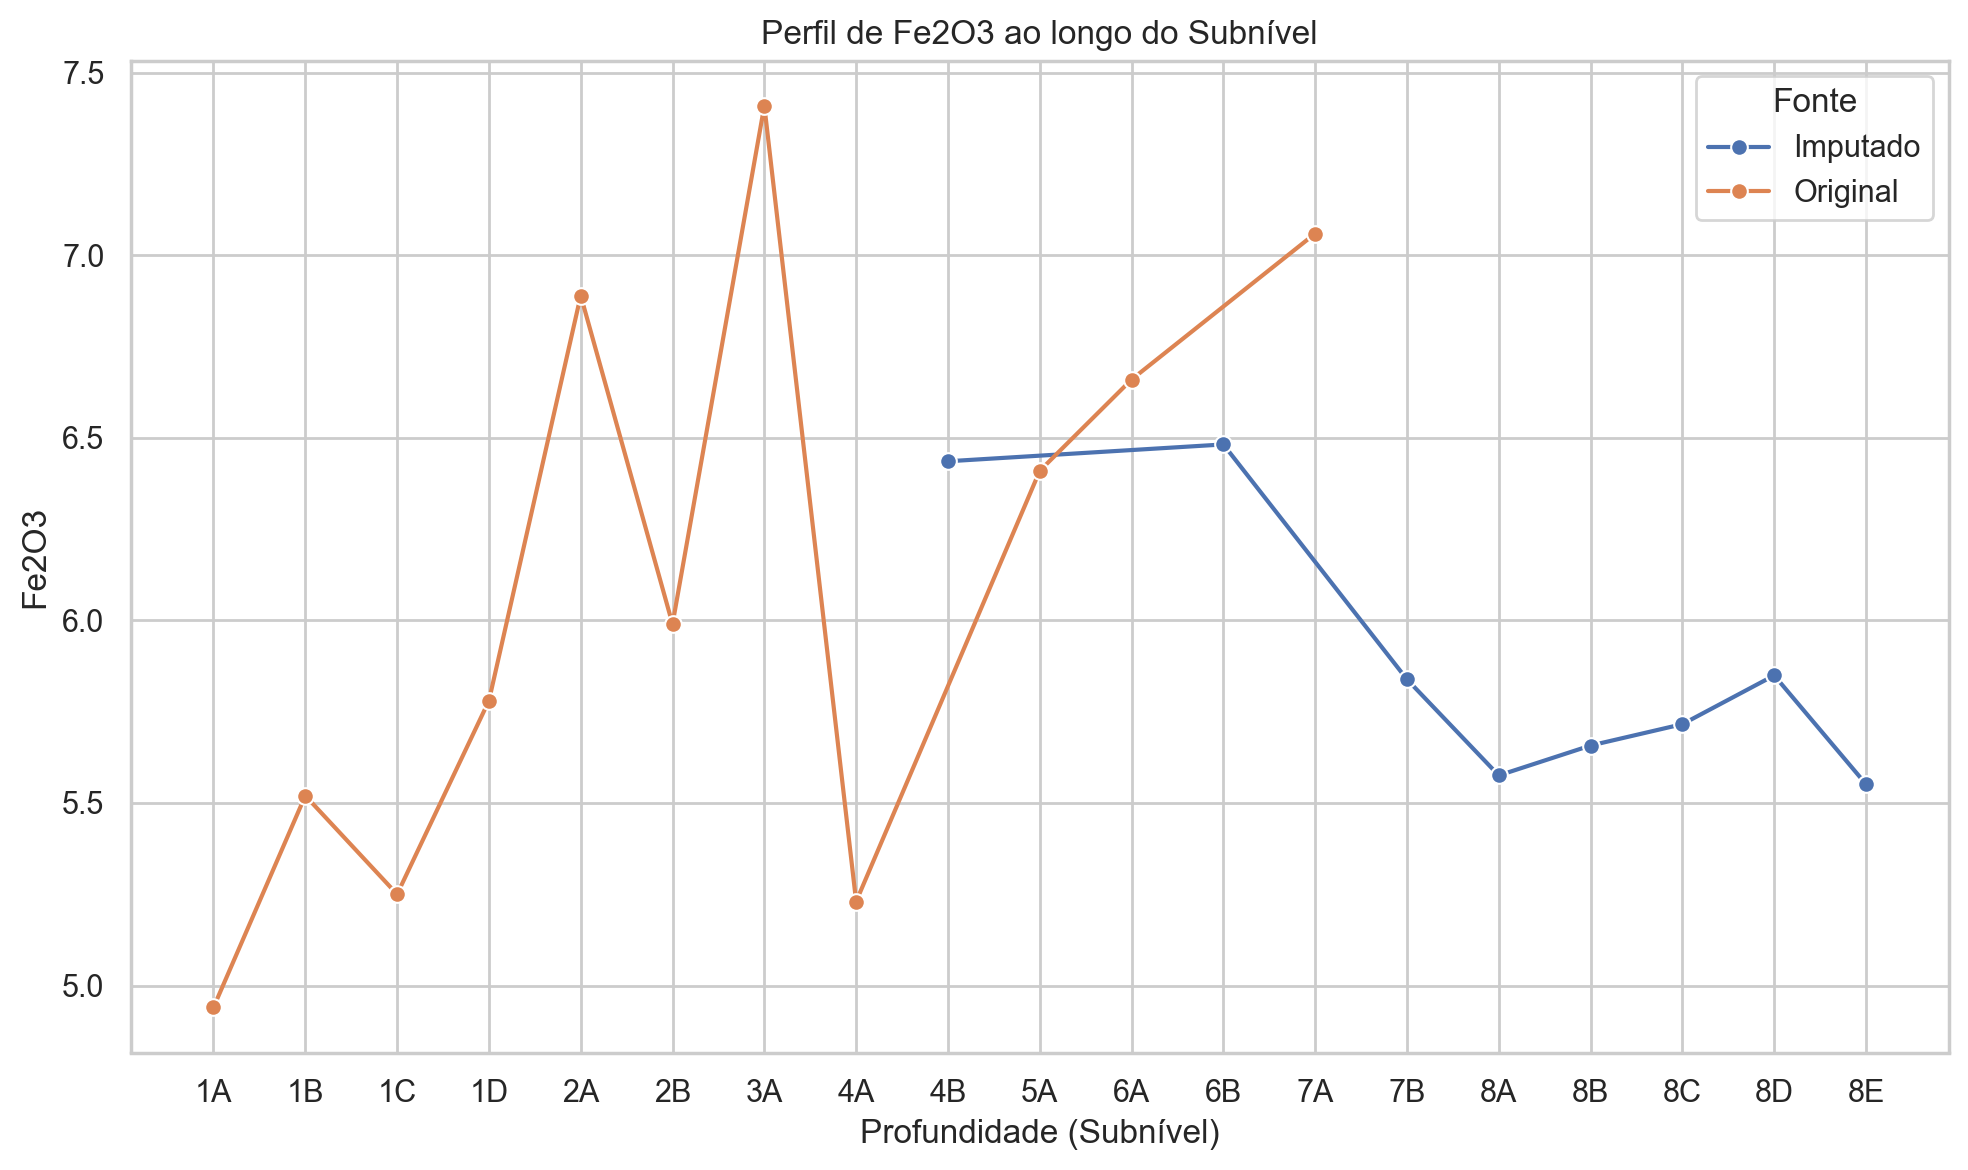

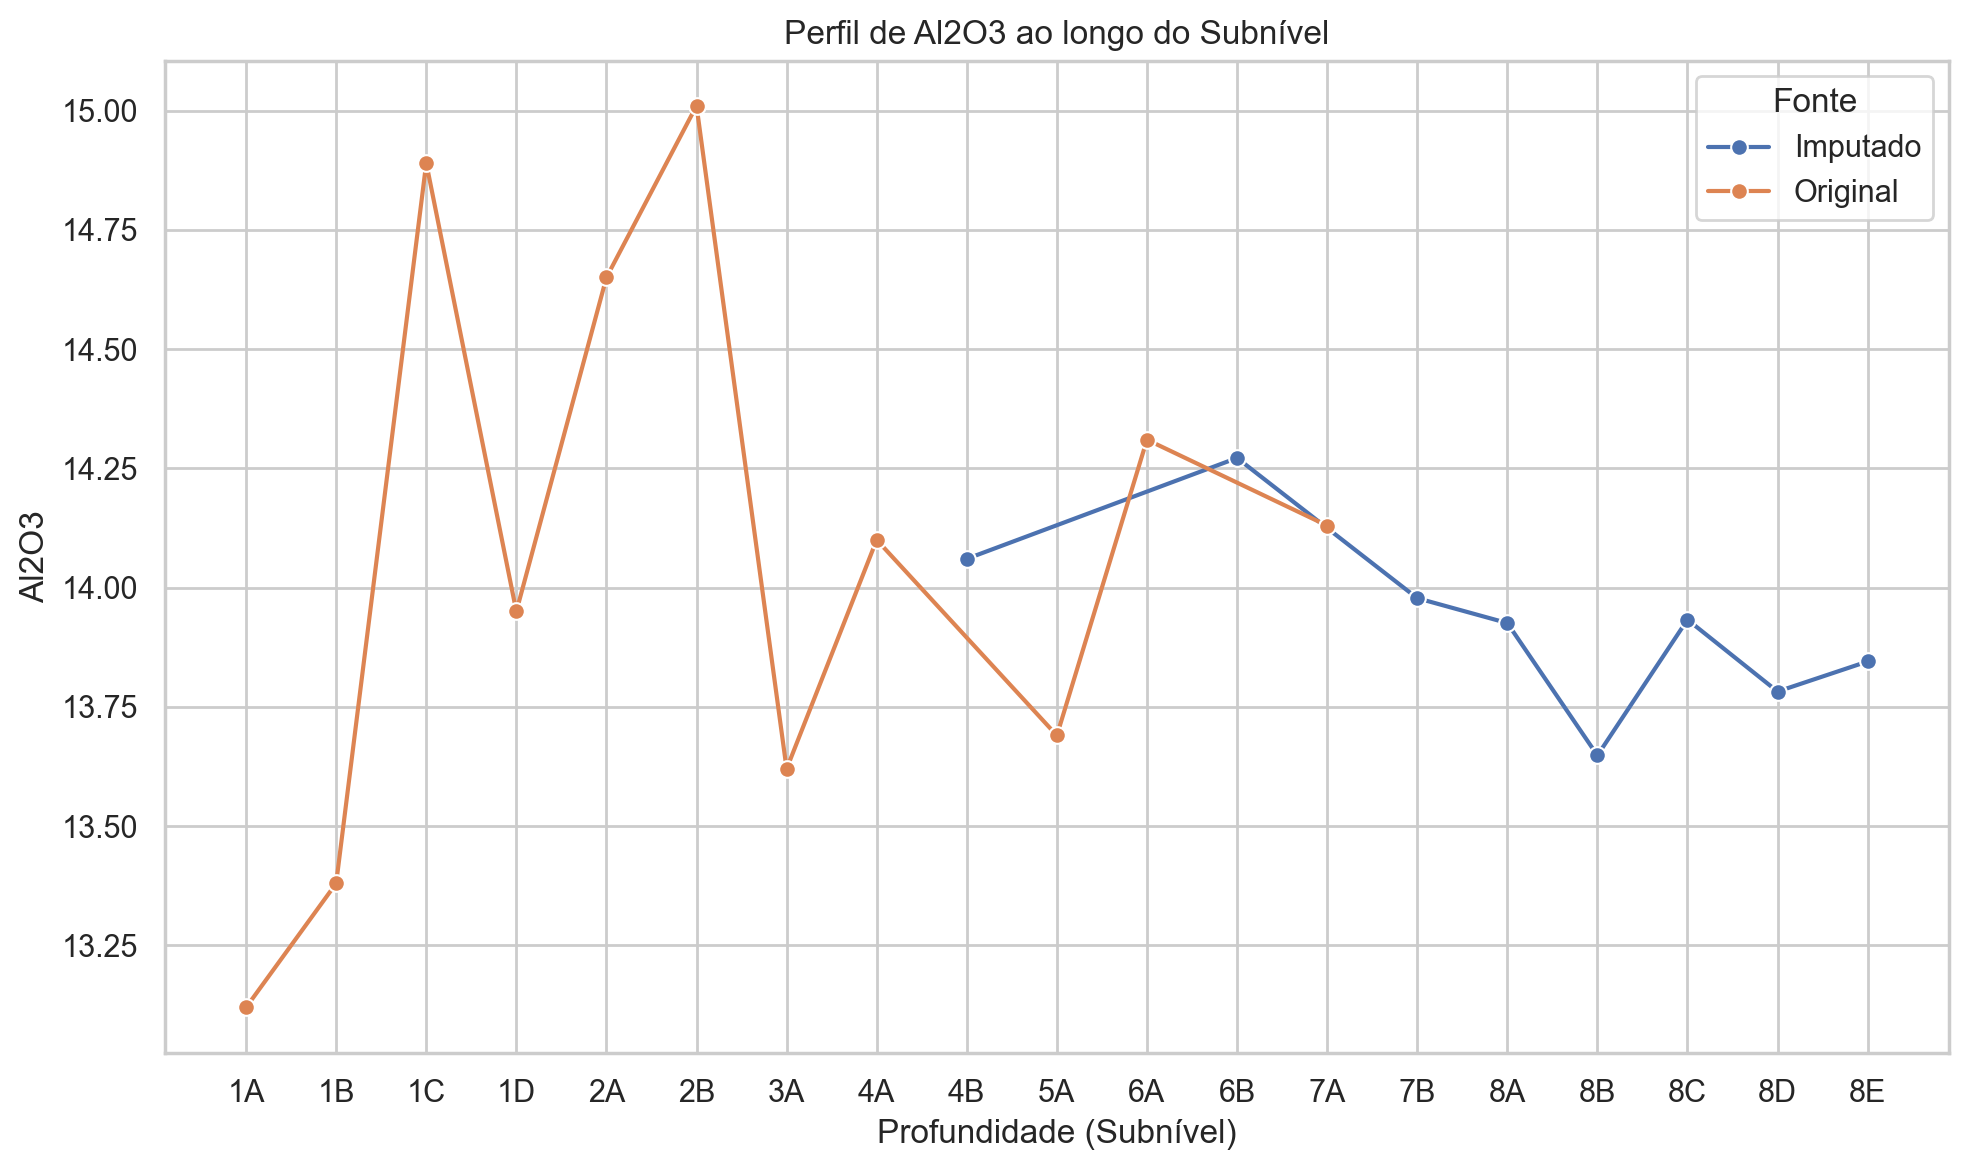

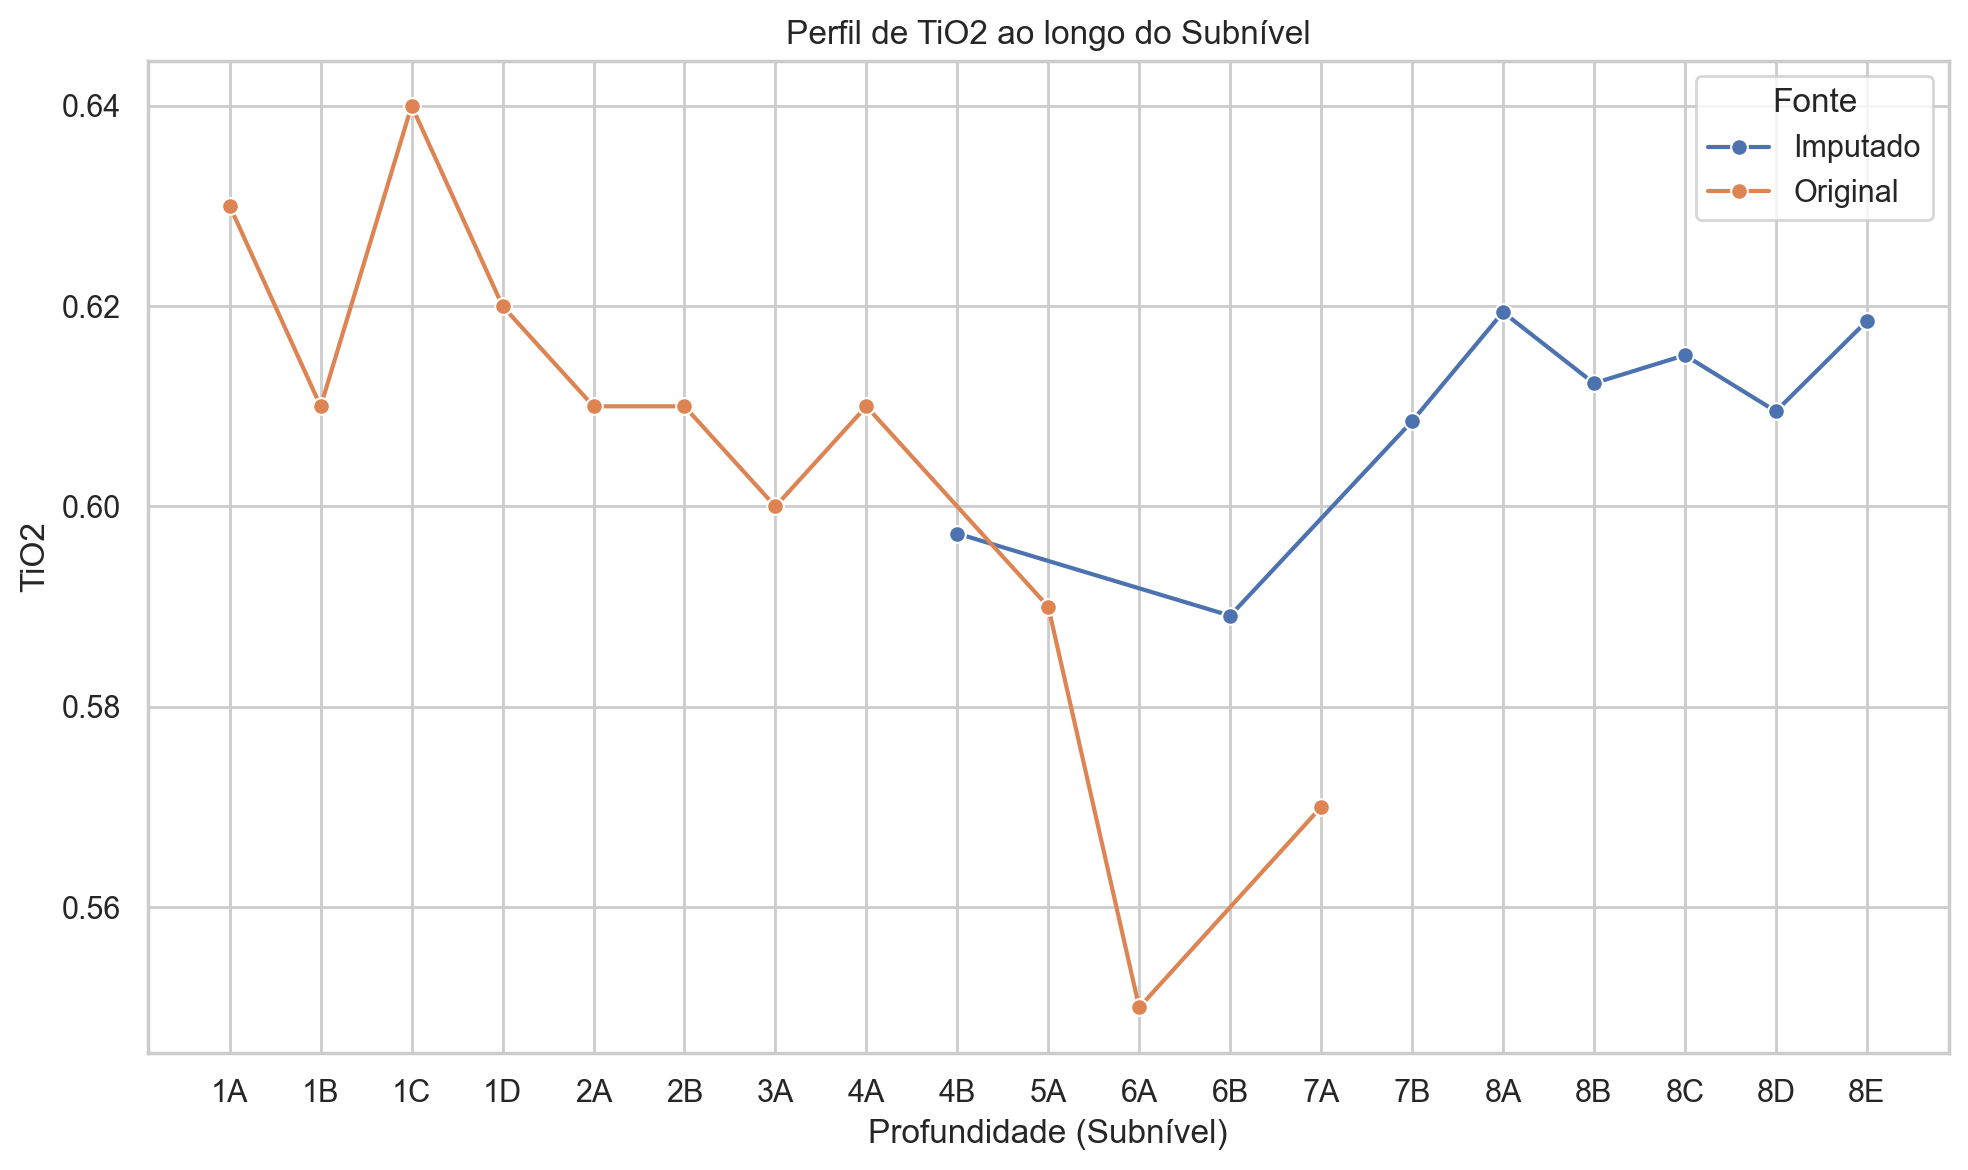

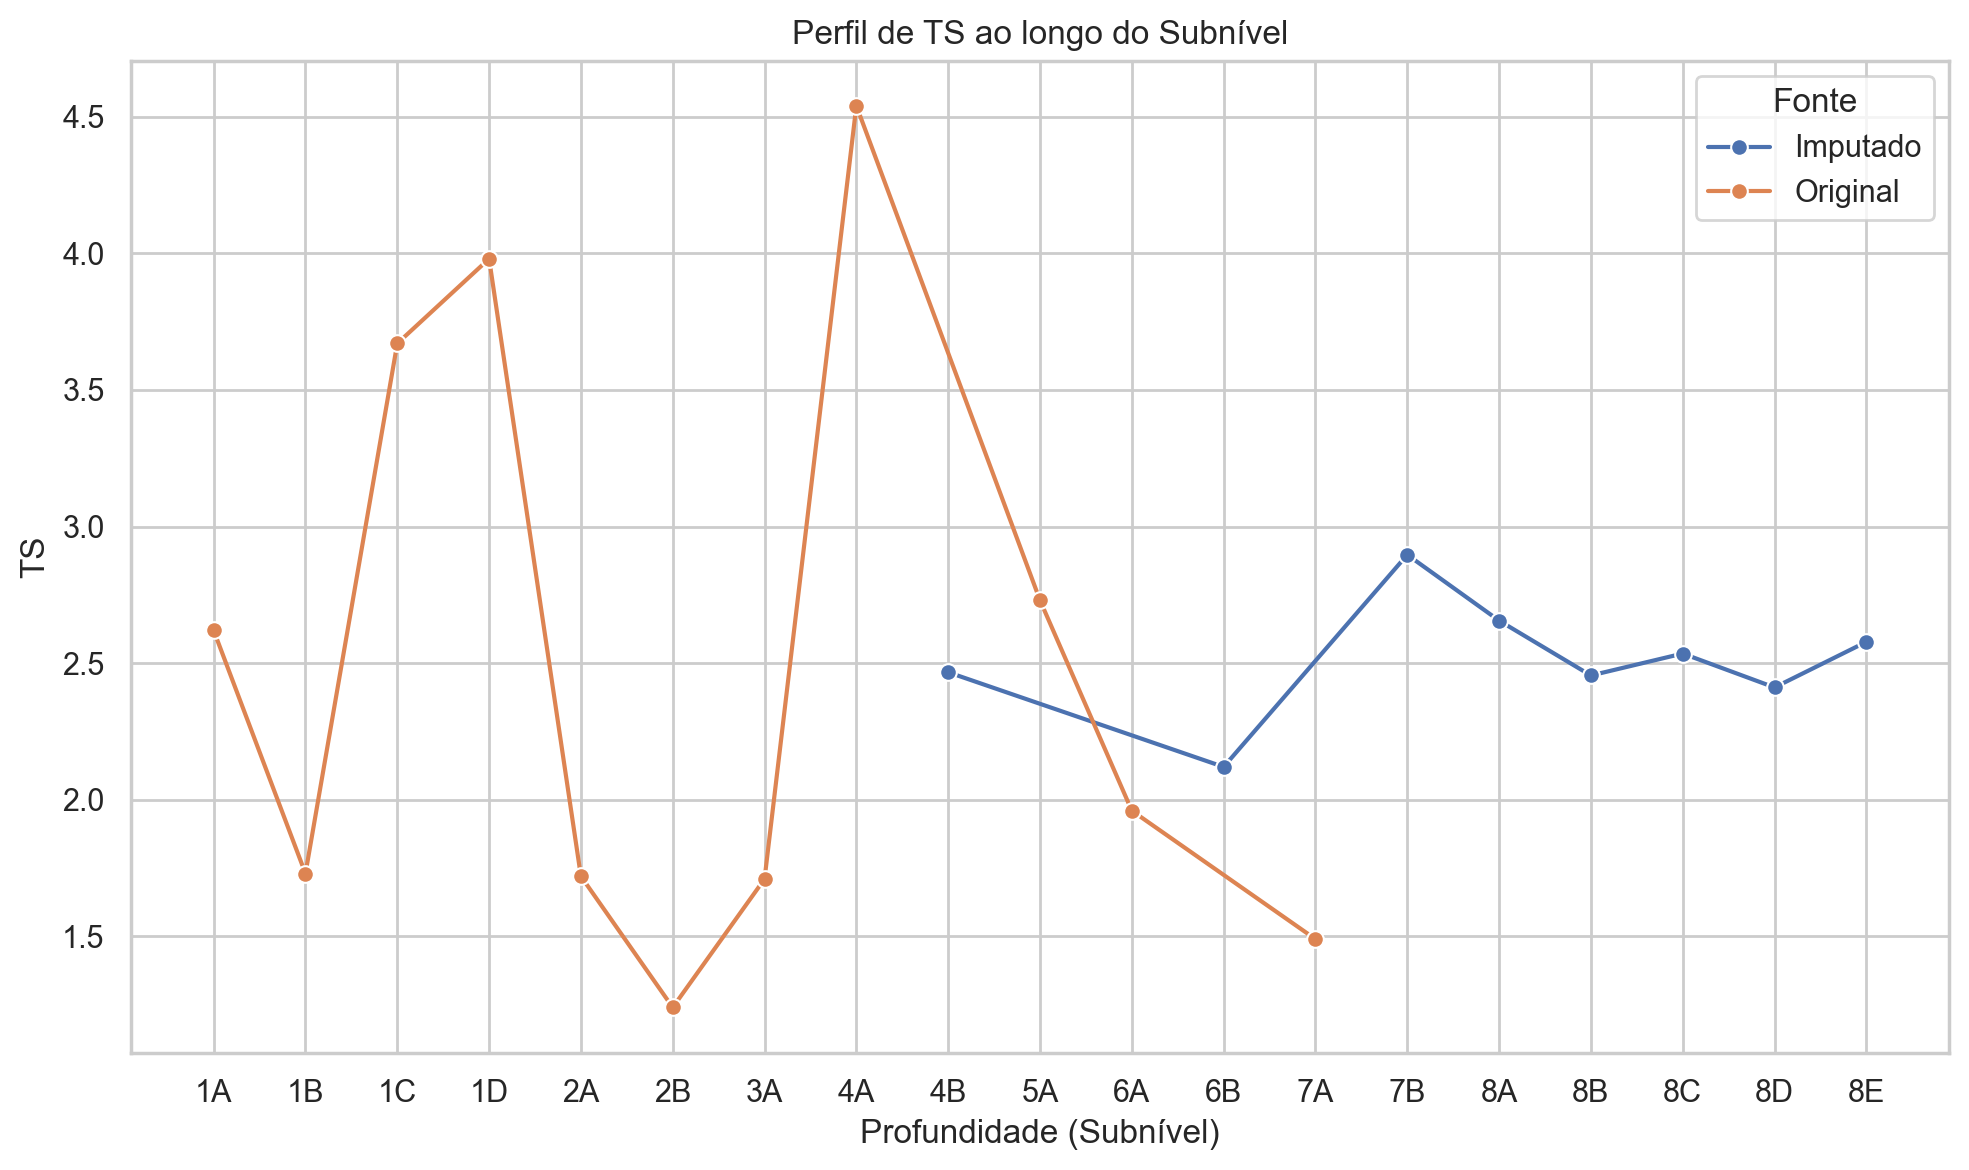

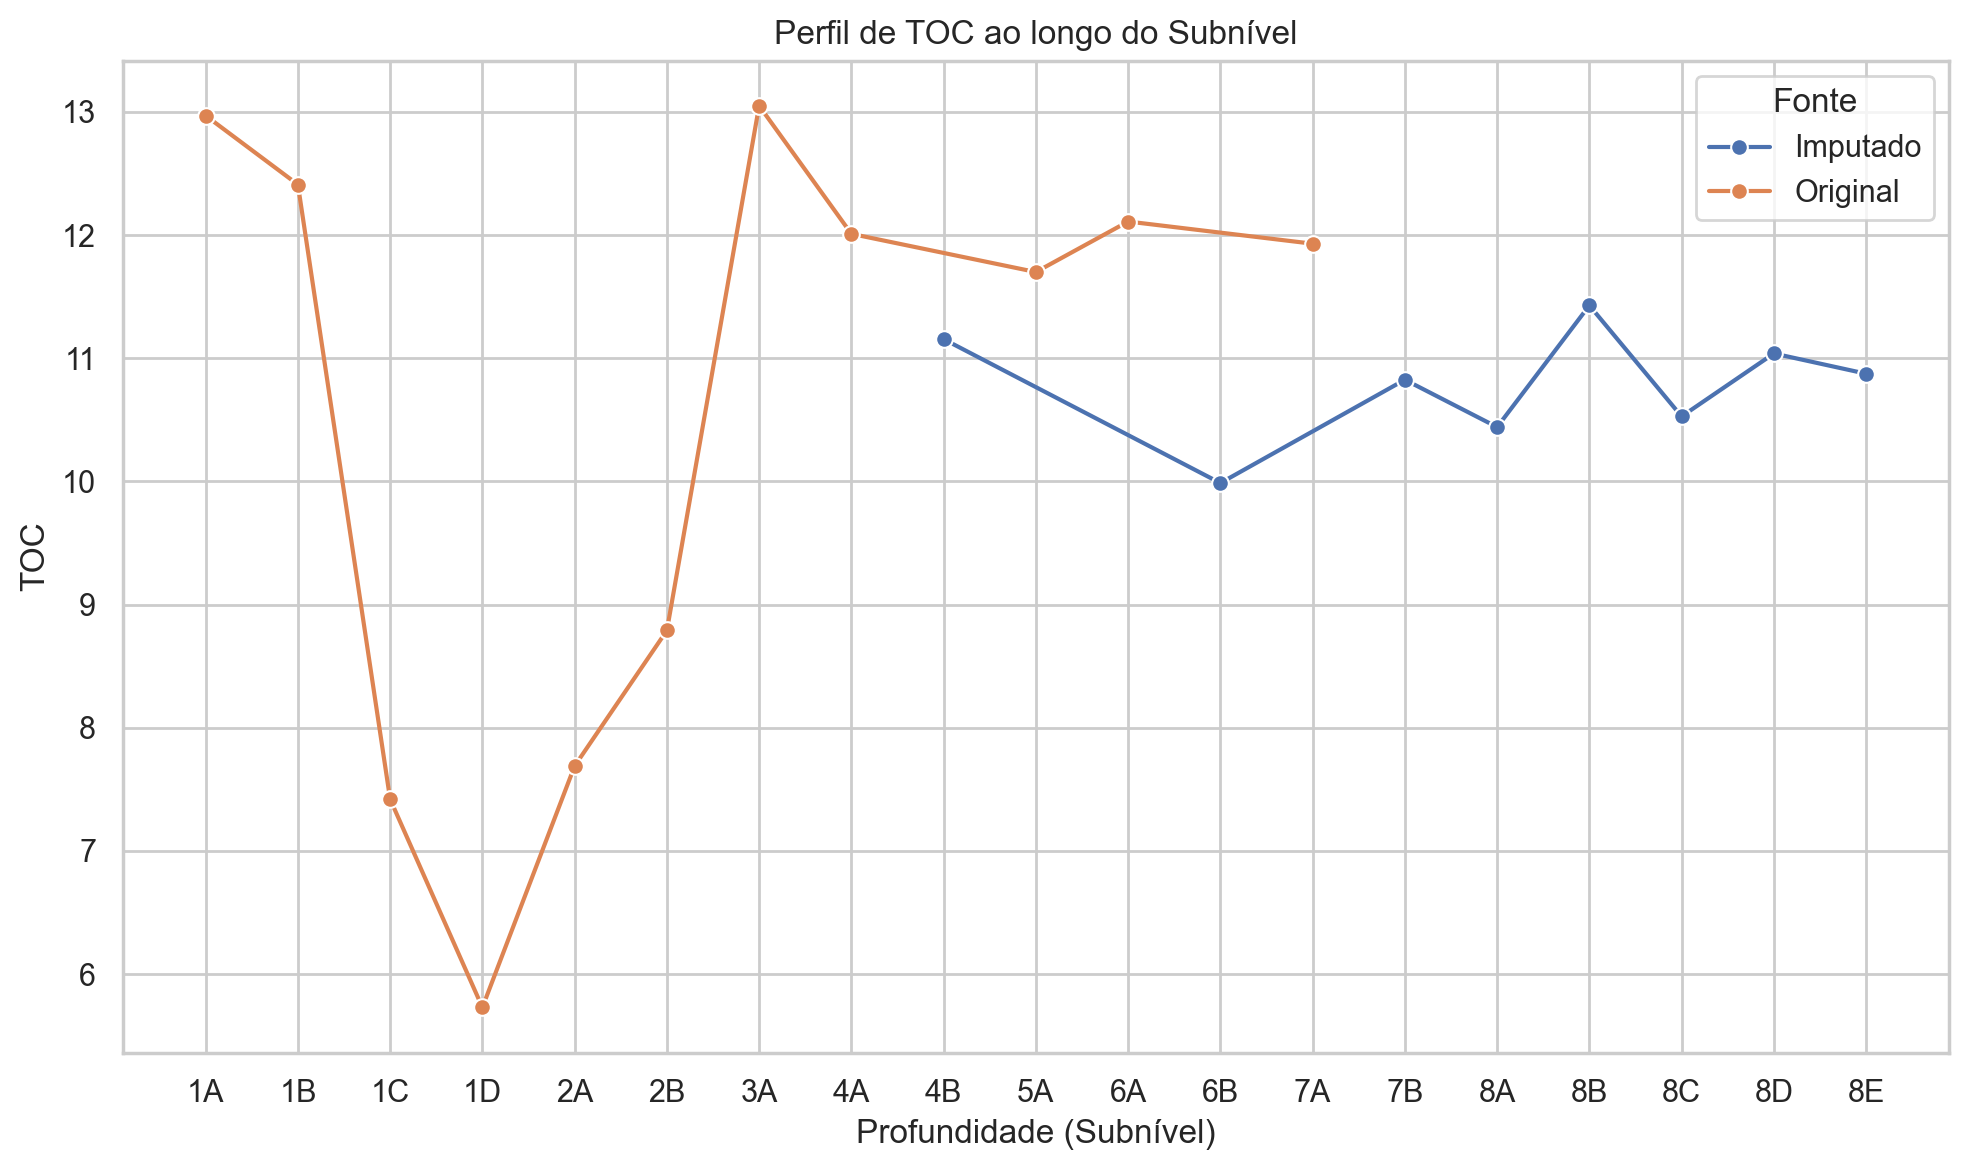

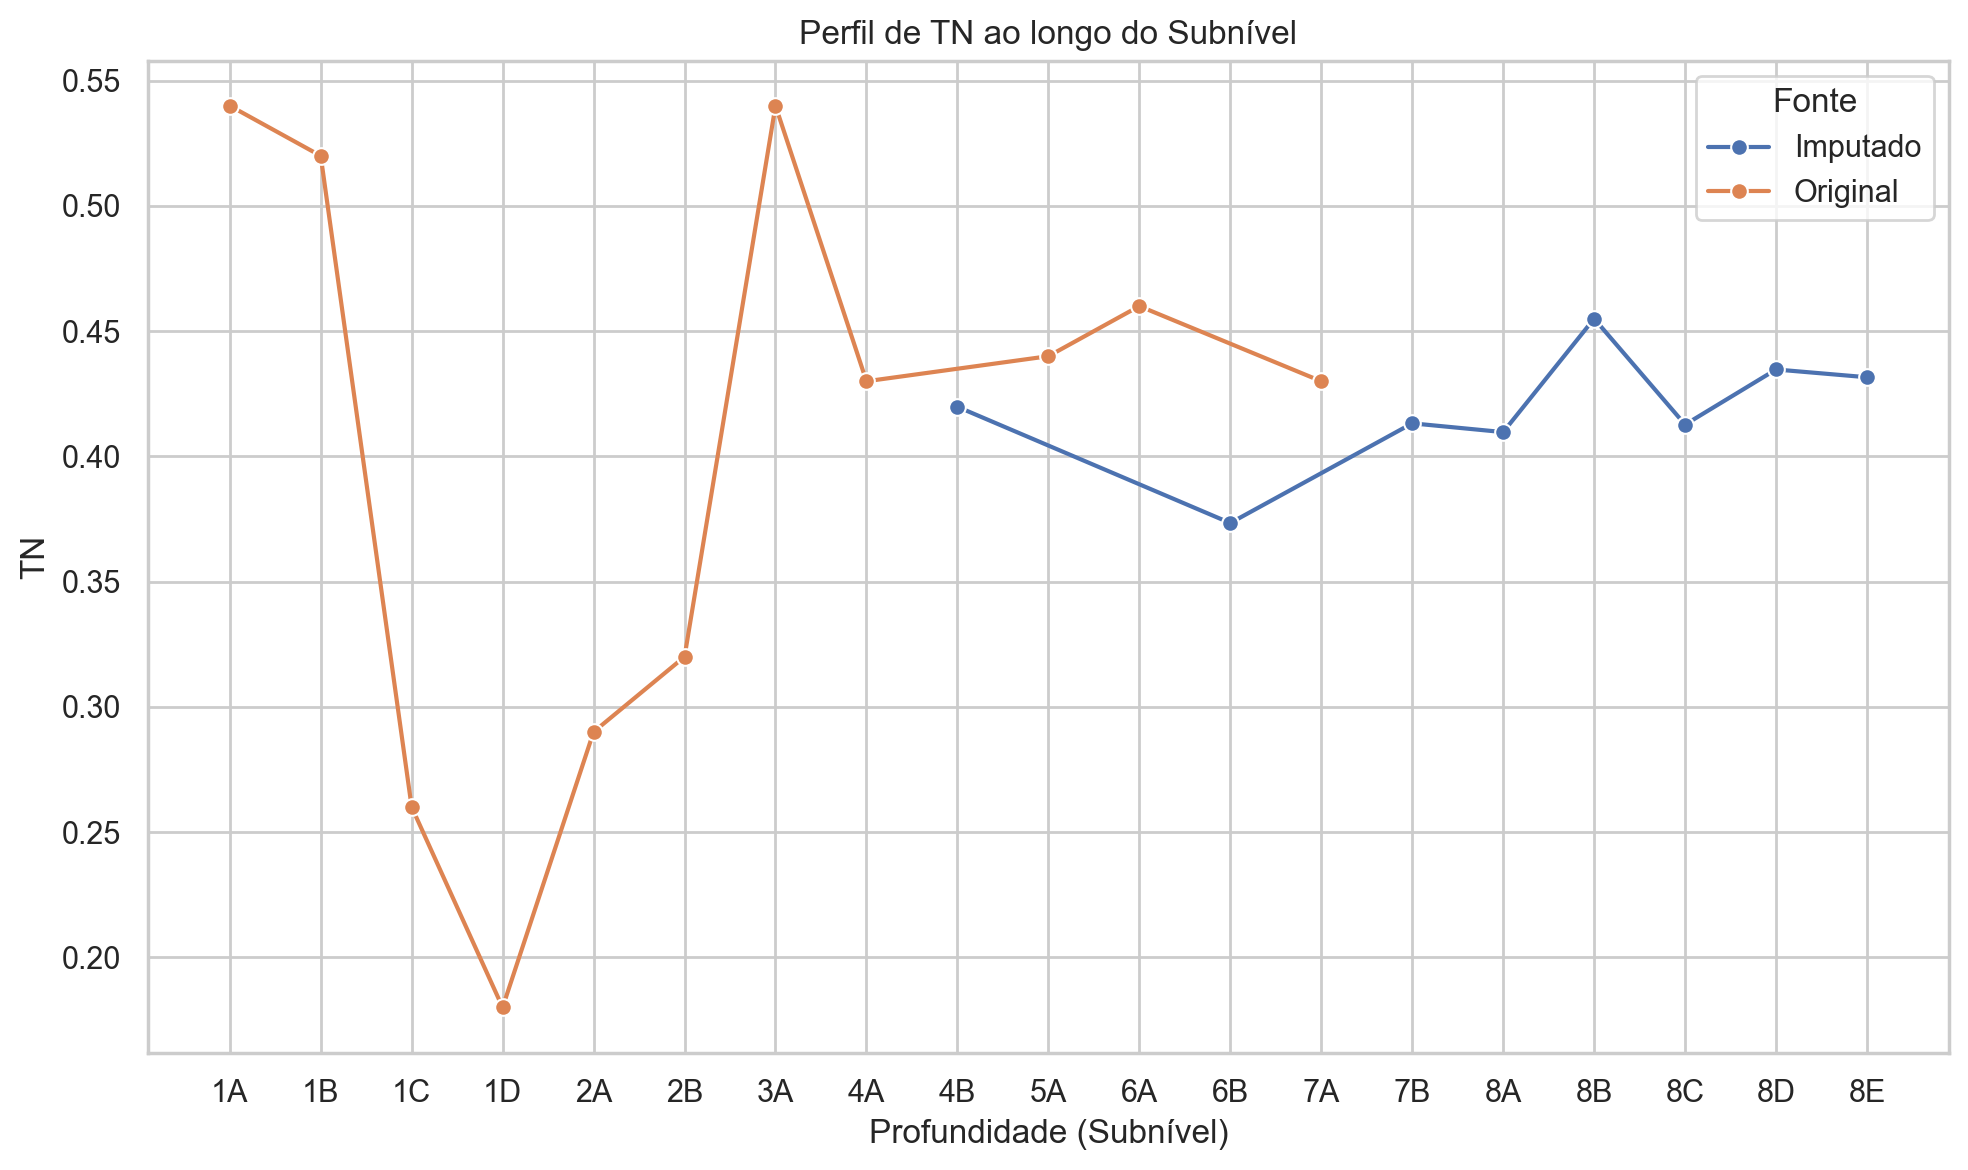

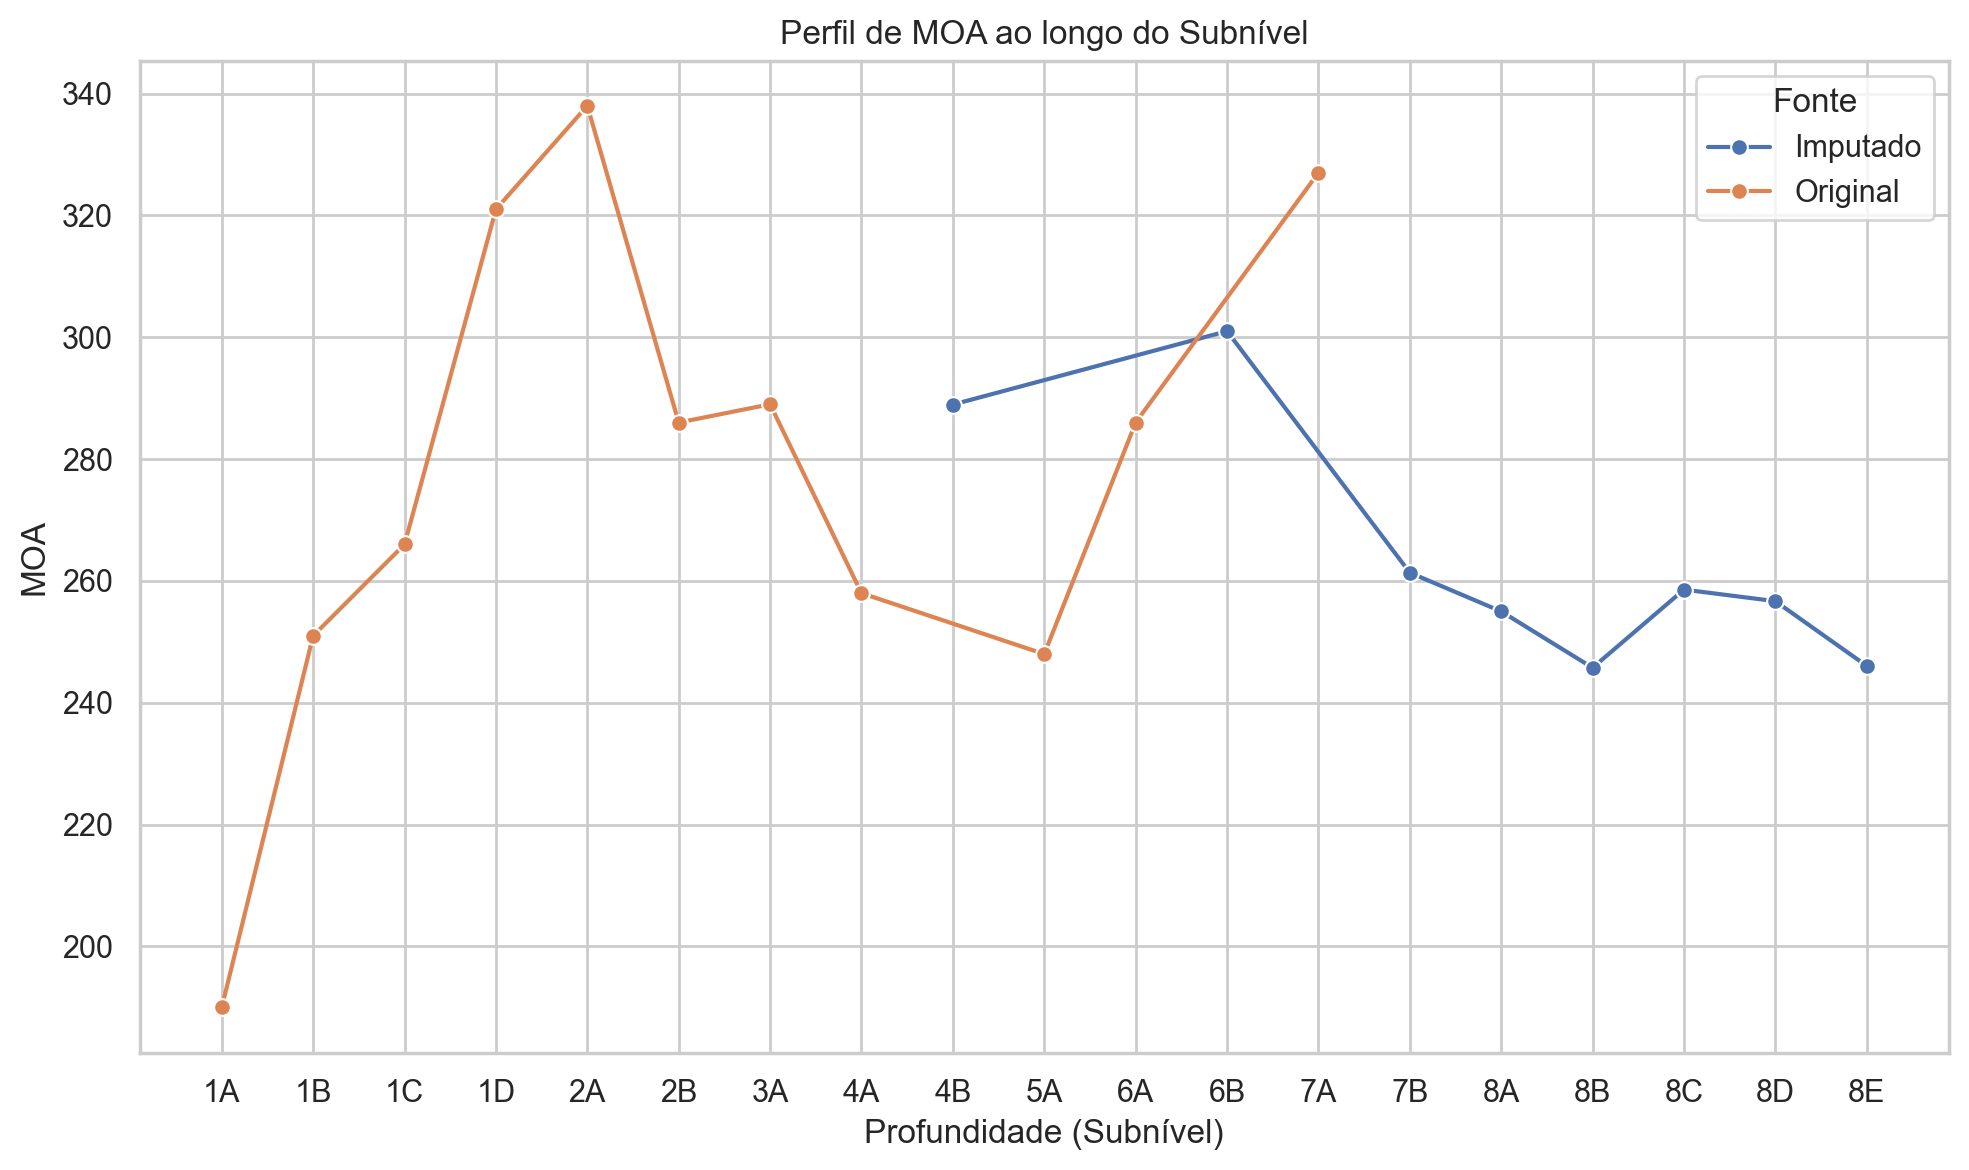

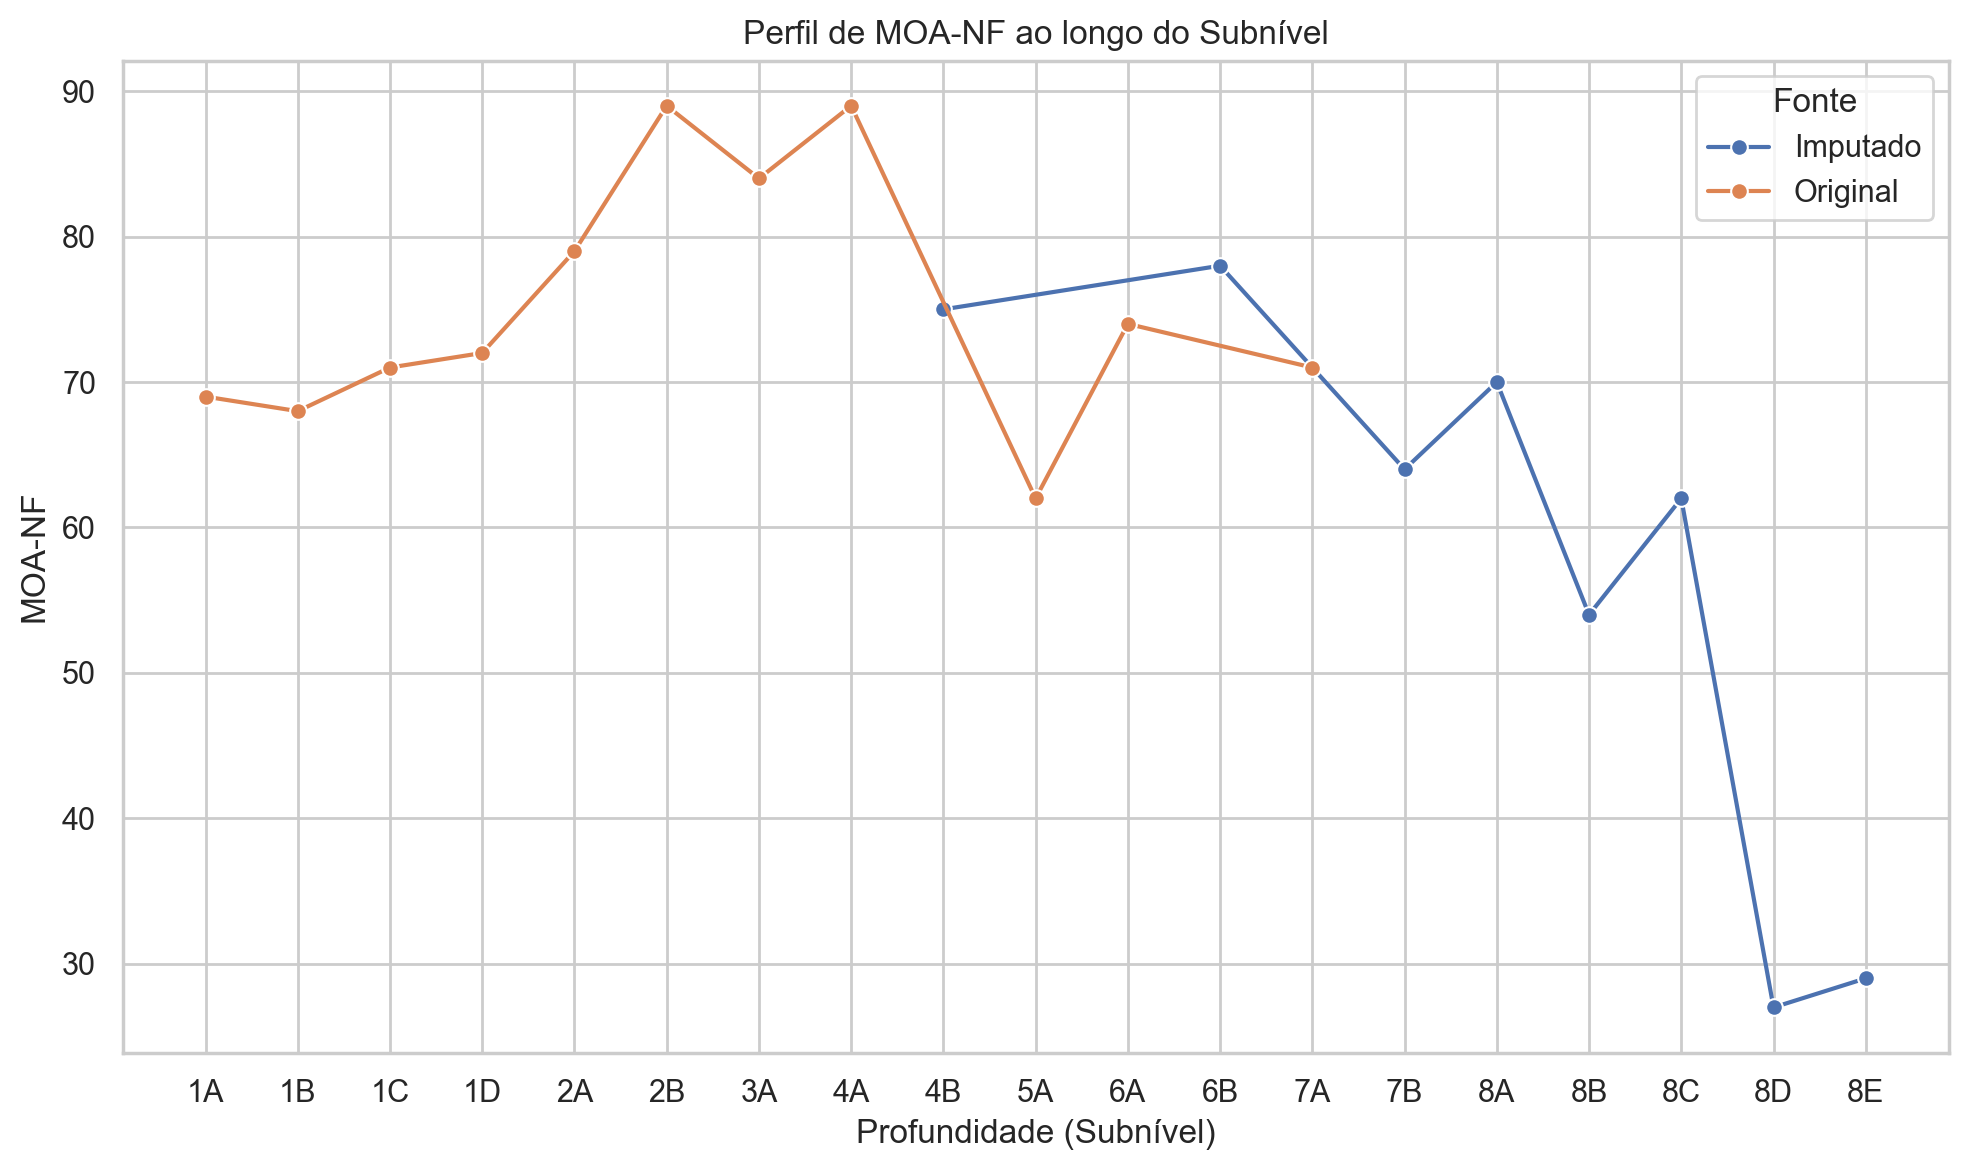

In [6]:
# Gráfico de linha: eixo x = profundidade, eixo y = teores
sns.lineplot(data=df, x="Subniveis", y="U/Th", hue="Fonte", marker="o")
plt.title("Perfil de U/Th ao longo do Subnível")
plt.xlabel("Profundidade (Subnível)")
plt.ylabel("U/Th")
plt.gca().invert_xaxis()  # Inverte o eixo X, se necessário, para profundidade aumentando da esquerda para a direita
plt.legend(title="Fonte")
plt.grid(True)
plt.tight_layout()
plt.show()

# Gráfico de linha: eixo x = profundidade, eixo y = teores
sns.lineplot(data=df, x="Subniveis", y="Fe2O3", hue="Fonte", marker="o")
plt.title("Perfil de Fe2O3 ao longo do Subnível")
plt.xlabel("Profundidade (Subnível)")
plt.ylabel("Fe2O3")
plt.gca().invert_xaxis()  # Inverte o eixo X, se necessário, para profundidade aumentando da esquerda para a direita
plt.legend(title="Fonte")
plt.grid(True)
plt.tight_layout()
plt.show()

# Gráfico de linha: eixo x = profundidade, eixo y = teores
sns.lineplot(data=df, x="Subniveis", y="Al2O3", hue="Fonte", marker="o")
plt.title("Perfil de Al2O3 ao longo do Subnível")
plt.xlabel("Profundidade (Subnível)")
plt.ylabel("Al2O3")
plt.gca().invert_xaxis()  # Inverte o eixo X, se necessário, para profundidade aumentando da esquerda para a direita
plt.legend(title="Fonte")
plt.grid(True)  
plt.tight_layout()
plt.show()

# Gráfico de linha: eixo x = profundidade, eixo y = teores
sns.lineplot(data=df, x="Subniveis", y="TiO2", hue="Fonte", marker="o")
plt.title("Perfil de TiO2 ao longo do Subnível")
plt.xlabel("Profundidade (Subnível)")
plt.ylabel("TiO2")
plt.gca().invert_xaxis()  # Inverte o eixo X, se necessário, para profundidade aumentando da esquerda para a direita
plt.legend(title="Fonte")
plt.grid(True)
plt.tight_layout()
plt.show()

# Gráfico de linha: eixo x = profundidade, eixo y = teores
sns.lineplot(data=df, x="Subniveis", y="TS", hue="Fonte", marker="o")
plt.title("Perfil de TS ao longo do Subnível")
plt.xlabel("Profundidade (Subnível)")
plt.ylabel("TS")
plt.gca().invert_xaxis()  # Inverte o eixo X, se necessário, para profundidade aumentando da esquerda para a direita
plt.legend(title="Fonte")
plt.grid(True)
plt.tight_layout()
plt.show()

# Gráfico de linha: eixo x = profundidade, eixo y = teores
sns.lineplot(data=df, x="Subniveis", y="TOC", hue="Fonte", marker="o")
plt.title("Perfil de TOC ao longo do Subnível")
plt.xlabel("Profundidade (Subnível)")
plt.ylabel("TOC")
plt.gca().invert_xaxis()  # Inverte o eixo X, se necessário, para profundidade aumentando da esquerda para a direita
plt.legend(title="Fonte")
plt.grid(True)
plt.tight_layout()
plt.show()

# Gráfico de linha: eixo x = profundidade, eixo y = teores
sns.lineplot(data=df, x="Subniveis", y="TN", hue="Fonte", marker="o")
plt.title("Perfil de TN ao longo do Subnível")
plt.xlabel("Profundidade (Subnível)")
plt.ylabel("TN")
plt.gca().invert_xaxis()  # Inverte o eixo X, se necessário, para profundidade aumentando da esquerda para a direita
plt.legend(title="Fonte")
plt.grid(True)
plt.tight_layout()
plt.show()

# Gráfico de linha: eixo x = profundidade, eixo y = teores
sns.lineplot(data=df, x="Subniveis", y="MOA", hue="Fonte", marker="o")
plt.title("Perfil de MOA ao longo do Subnível")
plt.xlabel("Profundidade (Subnível)")
plt.ylabel("MOA")
plt.gca().invert_xaxis()  # Inverte o eixo X, se necessário, para profundidade aumentando da esquerda para a direita
plt.legend(title="Fonte")
plt.grid(True)
plt.tight_layout()
plt.show()

# Gráfico de linha: eixo x = profundidade, eixo y = teores
sns.lineplot(data=df, x="Subniveis", y="MOA-NF", hue="Fonte", marker="o")
plt.title("Perfil de MOA-NF ao longo do Subnível")
plt.xlabel("Profundidade (Subnível)")
plt.ylabel("MOA-NF")
plt.gca().invert_xaxis()  # Inverte o eixo X, se necessário, para profundidade aumentando da esquerda para a direita
plt.legend(title="Fonte")
plt.grid(True)
plt.tight_layout()
plt.show()
